In [1]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

/home/simon/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
def sliding_average(data, window_size):
    """Calculate the sliding (moving) average of a dataset with edge handling."""
    pad_width = window_size // 2
    padded_data = np.pad(data, pad_width, mode='edge')
    smoothed_data = np.convolve(padded_data, np.ones(window_size) / window_size, mode='valid')
    return smoothed_data

In [3]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/files/shared-pyplot")
from plttools import PltTools
path_figures = git_path + "/figures/"

In [4]:
color1 = np.array([1, 0.682, 0.286])
color2 = np.array([0.008, 0.294, 0.478])
color3 = np.array([0.267, 0.647, 0.761])

In [5]:
log = lammps_logfile.File("improved.md.log")
timestep = 0.005
time = log.get("Step")*timestep
population1 = log.get("v_n1_in")
population2 = log.get("v_n2_in")
coordination = log.get("c_sumcoor12") 

In [6]:
smoothed_time = sliding_average(time, 5)
smoothed_coordination = sliding_average(coordination, 5)

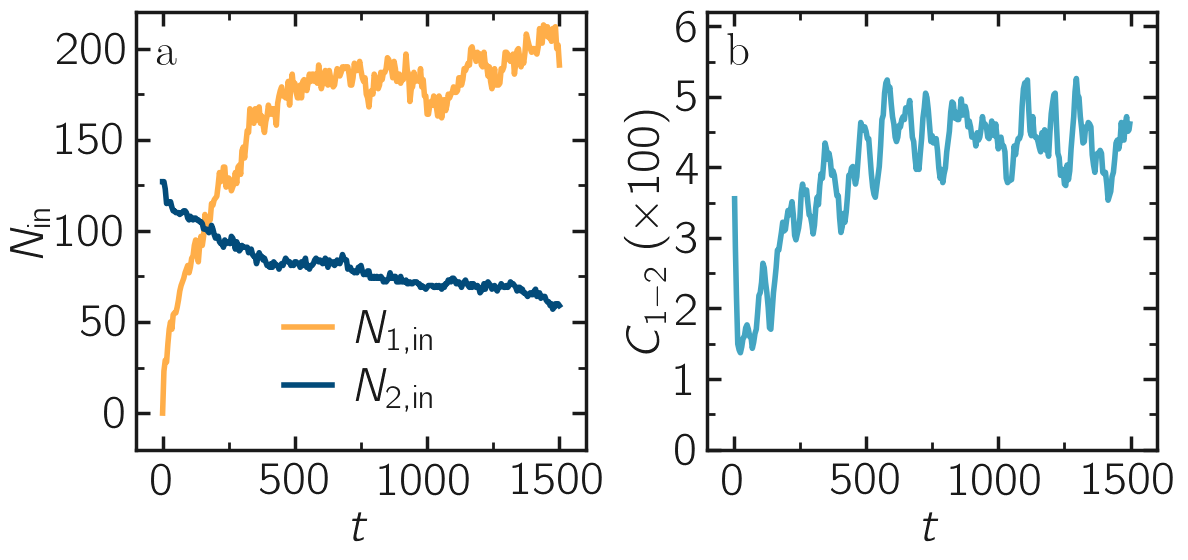

In [9]:
filename = "LJ-mixing"
# Initialise figure
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,5.7), dark_mode = False,
                     transparency = False, use_serif=False, n_colone=2)
# Panel a
myplt.add_panel()
myplt.add_plot(x = time, y = population1, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color1, markersize = 12, data_label = r'$N_\mathrm{1,in}$')
myplt.add_plot(x = time, y = population2, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12, data_label = r'$N_\mathrm{2,in}$')
myplt.complete_panel(ylabel = r'$N_\mathrm{in}$', xlabel = r'$t$',
                     xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 1501, 500), x_boundaries=(-100, 1600),
                     y_ticks=np.arange(0, 211, 50), y_boundaries=(-20, 220))
# Panel b
myplt.add_panel()
myplt.add_plot(x = smoothed_time, y = smoothed_coordination*100, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color3, markersize = 12)
myplt.complete_panel(ylabel = r'$C_{1-2} ~ (\times 100)$', xlabel = r'$t$',
                     xpad = 10, legend=False, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 1501, 500), x_boundaries=(-100, 1600),
                     y_ticks=np.arange(0, 6.1, 1), y_boundaries=(0, 6.2))
# Print figure
myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = path_figures)